In [358]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [359]:
hr = pd.read_csv(r"C:\Users\SHIVANG\Documents\Imarticus\Machine Learning\New folder\Classification Assignment\train_hr.csv", header = 0)
hr

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [360]:
print(hr.ndim)
print()
print(hr.shape)
print()
print(hr.describe())
print()
print(hr.info())

2

(54808, 14)

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.3

In [361]:
#create a copy of the dataframe 
hr1 = pd.DataFrame.copy(hr)
hr1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [362]:
hr1.duplicated().sum()
#there are no duplicates

0

#### FEATURE SELECTION
##### According to the domain knowledge and problem statement, we will be dropping or eliminating the following columns:  
##### 1) Region  
##### 2) Recruitment channel  

In [363]:
hr1.drop(['region','recruitment_channel'],axis=1,inplace=True)
hr1.shape

(54808, 12)

In [364]:
hr1.isnull().sum()

employee_id                0
department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [365]:
hr1.isnull().sum()/len(hr1)*100

employee_id             0.000000
department              0.000000
education               4.395344
gender                  0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [366]:
hr1=hr1.dropna(subset=['education'])

In [367]:
hr1.shape

(52399, 12)

#### Above we have dropped the missing values in education column because they are less than 10% of the data.  

In [368]:
hr1.previous_year_rating.mode()

0    3.0
Name: previous_year_rating, dtype: float64

In [369]:
hr1['previous_year_rating'].fillna(hr1.previous_year_rating.mode()[0],inplace=True)

In [370]:
hr1.isnull().sum()

employee_id             0
department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Above we are filling the missing values in the column of previous year rating with mode.

In [371]:
hr1.dtypes

employee_id               int64
department               object
education                object
gender                   object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [372]:
# To check if there are any special characters
for i in hr1.columns:
    print({i:hr1[i].unique()})

{'employee_id': array([65438, 65141,  7513, ..., 74592, 13918, 51526], dtype=int64)}
{'department': array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)}
{'education': array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)}
{'gender': array(['f', 'm'], dtype=object)}
{'no_of_trainings': array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)}
{'age': array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 27, 29, 26, 57, 40,
       42, 23, 59, 44, 50, 56, 20, 25, 41, 47, 36, 46, 60, 24, 43, 54, 22,
       58, 48, 55, 51, 52, 53, 21], dtype=int64)}
{'previous_year_rating': array([5., 3., 1., 4., 2.])}
{'length_of_service': array([ 8,  4,  7, 10,  2,  5,  6,  3, 16,  9,  1, 26, 12, 11, 17, 14, 13,
       19, 15, 23, 20, 18, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)}
{'KPIs_met >80%': array([1, 0], dtype=int64)}
{'awards_won?': array([0, 1], dtype=in

#### Converting Categorical columns into to numerical columns

In [373]:
#Gender
hr1.gender.replace({'f':0,'m':1},inplace=True)

In [374]:
hr1.dtypes

employee_id               int64
department               object
education                object
gender                    int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

#### Now converting the department and education column via label encoder

In [376]:
col=[]
for i in hr1.columns:
    if hr1[i].dtype=='object':
        col.append(i)

print(col)
    

['department', 'education']


In [377]:
#preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in col:
    hr1[i]=le.fit_transform(hr1[i])


In [378]:
hr1.dtypes

employee_id               int64
department                int32
education                 int32
gender                    int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

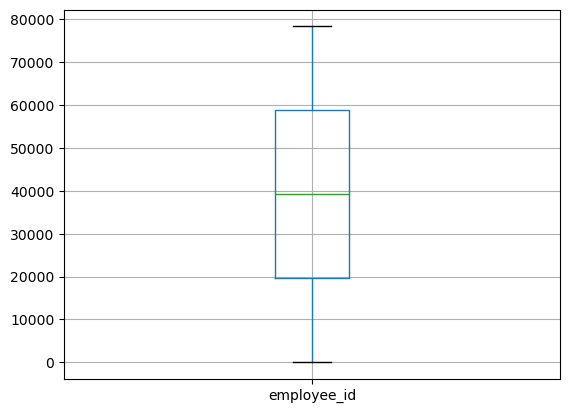

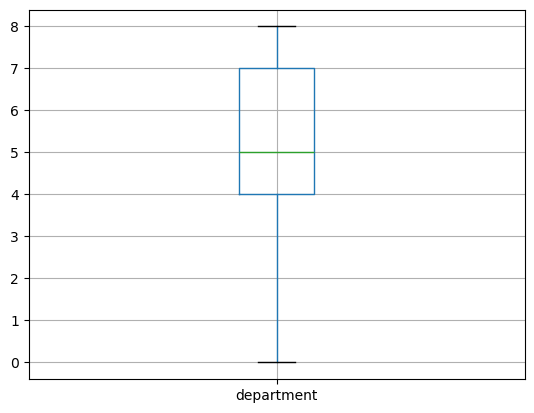

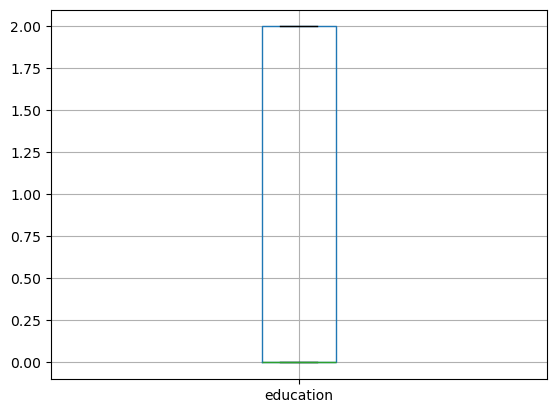

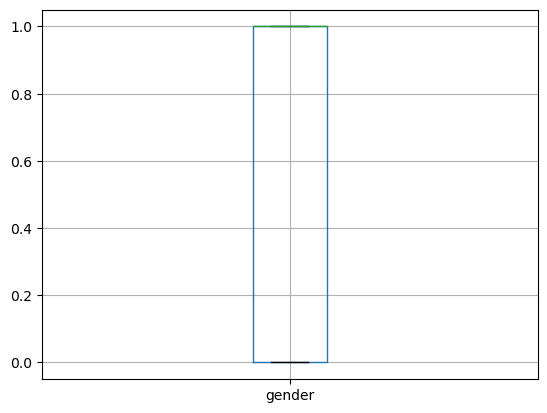

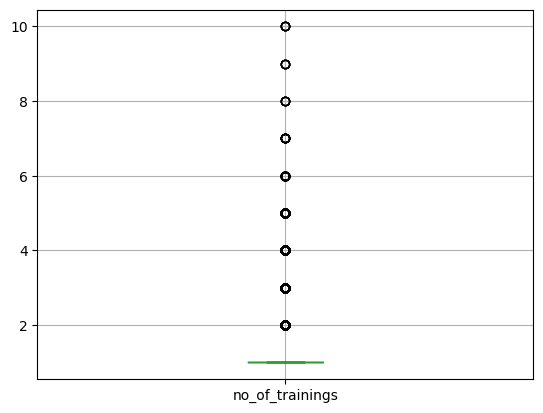

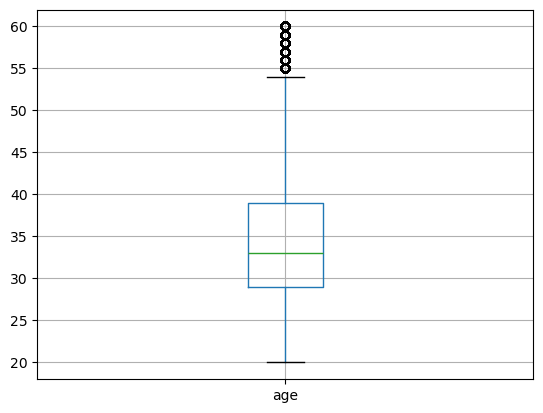

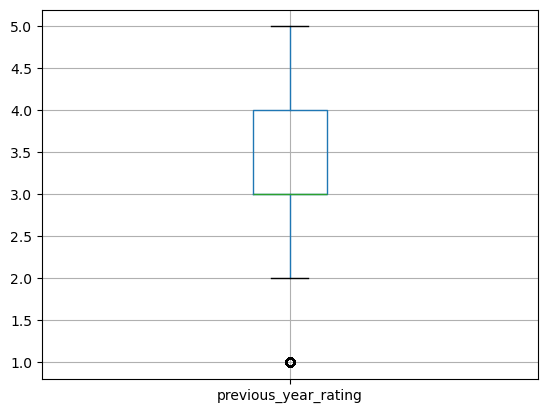

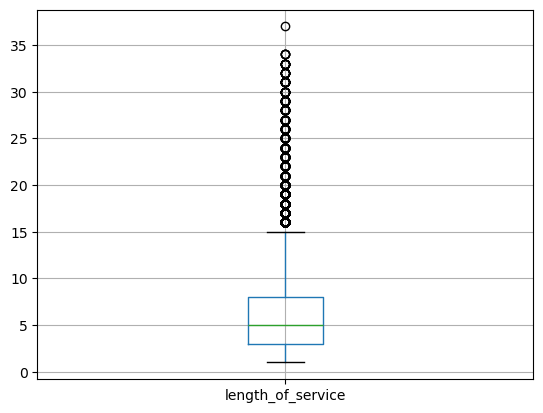

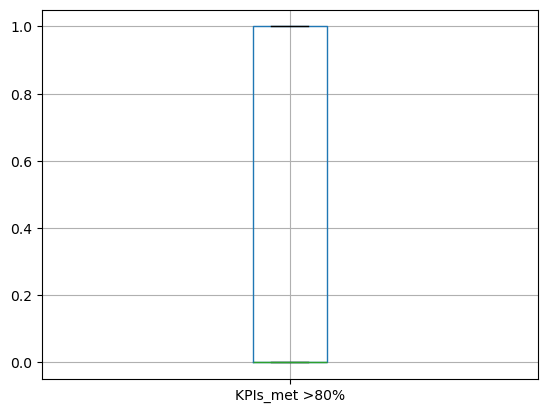

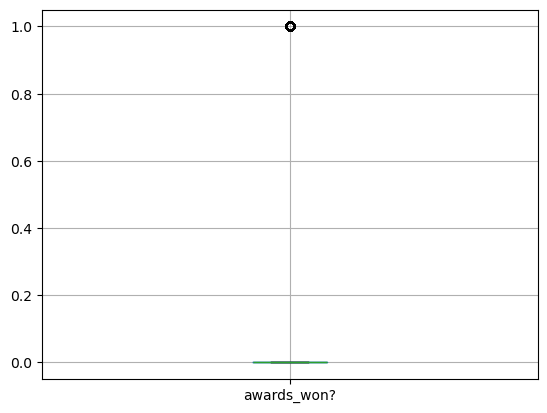

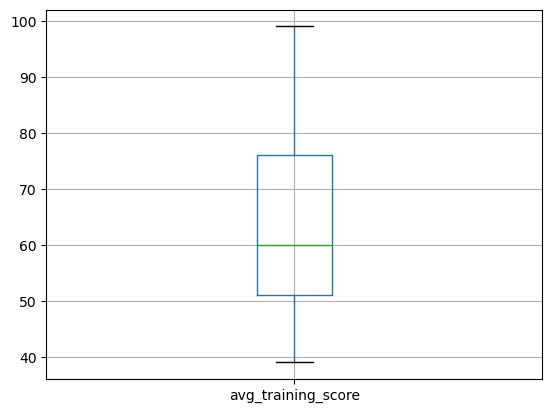

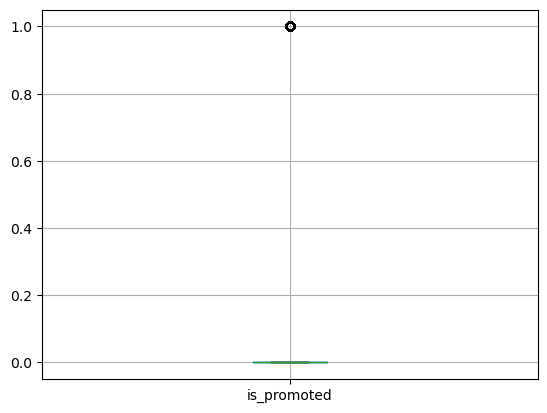

In [379]:
for i in hr1.columns:
    hr1.boxplot(column = i)
    plt.show()

#### There are no need to deal with outliers because they are in 0 to 1 range

________
#### Create X and Y

In [380]:
X = hr1.values[:,0:-1]
Y = hr1.values[:,-1]

In [381]:
print(X.shape)
print(Y.shape)

(52399, 11)
(52399,)


#### Scaling the data

In [382]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [383]:
print(X1)

[[ 1.16176715  0.82161748  1.56982865 ...  1.34264108 -0.15400612
  -1.09997424]
 [ 1.14862449 -0.37865949 -0.64905786 ... -0.74480069 -0.15400612
  -0.272768  ]
 [-1.40149338  0.82161748 -0.64905786 ... -0.74480069 -0.15400612
  -1.02477368]
 ...
 [ 1.56684418 -0.37865949  1.56982865 ... -0.74480069 -0.15400612
  -0.57357027]
 [-1.11806336 -1.97902877 -0.64905786 ...  1.34264108 -0.15400612
   1.15604279]
 [ 0.54614211 -1.17884413 -0.64905786 ... -0.74480069 -0.15400612
  -1.09997424]]


#### Split the data

In [384]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, test_size=0.3, random_state=10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(36679, 11)
(36679,)
(15720, 11)
(15720,)


#### Build the model

In [385]:
from sklearn.linear_model import LogisticRegression

hrm= LogisticRegression()
hrm.fit(X_train,Y_train)

print(hrm.intercept_)
print(hrm.coef_)

[-2.87338665]
[[-0.00161837  0.18246792  0.10603104 -0.00664815 -0.10489941 -0.15648175
   0.40073656  0.10991585  0.59124879  0.28271493  0.61076895]]


In [386]:
print(list(zip(hr1.columns[0:-1], hrm.coef_.ravel())))

[('employee_id', -0.001618368483297732), ('department', 0.18246792117672198), ('education', 0.10603103950458846), ('gender', -0.0066481547195183545), ('no_of_trainings', -0.10489940696779305), ('age', -0.15648175193304792), ('previous_year_rating', 0.40073655766520383), ('length_of_service', 0.10991584929830832), ('KPIs_met >80%', 0.5912487888068514), ('awards_won?', 0.28271493066880005), ('avg_training_score', 0.6107689493626515)]


In [387]:
Y_pred = hrm.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [388]:
Y_pred_prob = hrm.predict_proba(X_test)
Y_pred_prob

array([[0.89480681, 0.10519319],
       [0.97540887, 0.02459113],
       [0.77694048, 0.22305952],
       ...,
       [0.98514911, 0.01485089],
       [0.99177946, 0.00822054],
       [0.97953767, 0.02046233]])

#### Evaluation Phase

In [389]:
#check Y actuals with Y predicted values to check manually if the model has classified correctly.
print(list(zip(Y_test,Y_pred)))


[(0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.

#### Confusion Matrix

In [390]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[14280    49]
 [ 1310    81]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95     14329
         1.0       0.62      0.06      0.11      1391

    accuracy                           0.91     15720
   macro avg       0.77      0.53      0.53     15720
weighted avg       0.89      0.91      0.88     15720

Accuracy of the model:  0.9135496183206107


##### the accuracy is 0.91 because its in the range from 0 to 1. Its a good model untill now. But its not so good as there are many type 2 errors, we can try to improvise it via tuning the model.

#### Tuning the model

In [391]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0) #this check if the predicted values is greater than 1 
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1373  , type 2 error : 1258  , type 1 error: 115
Errors at threshold  0.41000000000000003 : 1366  , type 2 error : 1266  , type 1 error: 100
Errors at threshold  0.42000000000000004 : 1367  , type 2 error : 1274  , type 1 error: 93
Errors at threshold  0.43000000000000005 : 1358  , type 2 error : 1279  , type 1 error: 79
Errors at threshold  0.44000000000000006 : 1347  , type 2 error : 1282  , type 1 error: 65
Errors at threshold  0.45000000000000007 : 1348  , type 2 error : 1286  , type 1 error: 62
Errors at threshold  0.4600000000000001 : 1350  , type 2 error : 1292  , type 1 error: 58
Errors at threshold  0.4700000000000001 : 1352  , type 2 error : 1295  , type 1 error: 57
Errors at threshold  0.4800000000000001 : 1355  , type 2 error : 1302  , type 1 error: 53
Errors at threshold  0.4900000000000001 : 1356  , type 2 error : 1306  , type 1 error: 50
Errors at threshold  0.5000000000000001 : 1359  , type 2 error : 1310  , type 1 error: 49
Errors at threshol

#### We will be evaluating the data with the '0.43' and '0.44' treshold to get the best model.

In [393]:
#create an empty list to store our own predicted values with the treshold value at 0.43
#1)
y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.43:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [394]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc) 

[[14250    79]
 [ 1279   112]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     14329
         1.0       0.59      0.08      0.14      1391

    accuracy                           0.91     15720
   macro avg       0.75      0.54      0.55     15720
weighted avg       0.89      0.91      0.88     15720

Accuracy of the model:  0.9136132315521629


In [395]:
#create an empty list to store our own predicted values with the treshold value at 0.44
#2)
y_pred_class_ = []
for value in Y_pred_prob[:,1]:
    if value > 0.44:
        y_pred_class_.append(1)
    else:
        y_pred_class_.append(0)

print(y_pred_class_)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [396]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class_)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class_))
 
acc=accuracy_score(Y_test, y_pred_class_)
print("Accuracy of the model: ",acc) 

[[14264    65]
 [ 1282   109]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95     14329
         1.0       0.63      0.08      0.14      1391

    accuracy                           0.91     15720
   macro avg       0.77      0.54      0.55     15720
weighted avg       0.89      0.91      0.88     15720

Accuracy of the model:  0.9143129770992366


#### Analysis
##### We will select the treshold of 0.44 because the accuracy has increased comparing to the other treshold and also because the total no of errors has decreased. 

### _____________________________________________________________________
### Now doing on the testing data

#### TESTING DATA

#### Importing|the testing file from the directory and assigning it to the variable hr_test

In [397]:
hr_test = pd.read_csv(r"C:\Users\SHIVANG\Documents\Imarticus\Machine Learning\New folder\Classification Assignment\test_hr.csv",header=0)
hr_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [398]:
print(hr_test.shape)
print()
print(hr_test.info())
print()
print(hr_test.describe())

(23490, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None

        employee_id  no_of_trainings         

In [399]:
hr_test.duplicated().sum()

0

In [400]:
hr_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [401]:
hr_test.drop(['region','recruitment_channel'],axis=1,inplace=True)
hr_test.shape

(23490, 11)

In [402]:
hr_test.isnull().sum()

employee_id                0
department                 0
education               1034
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [403]:
hr_test=hr_test.dropna(subset=['education'])
hr_test

,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,Bachelor's,m,1,24,NaN,1,1,0,77
1,74430,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,38562,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,64486,Finance,Bachelor's,m,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,Below Secondary,m,1,24,3.0,1,0,0,61
23486,25600,Technology,Bachelor's,m,1,31,3.0,7,0,0,74
23487,45409,HR,Bachelor's,f,1,26,4.0,4,0,0,50
23488,1186,Procurement,Bachelor's,m,3,27,NaN,1,0,0,70


In [420]:
hr_test['previous_year_rating'].fillna(hr_test.previous_year_rating.mode()[0],inplace=True)

In [421]:
hr_test.isnull().sum()

employee_id             0
department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

#### Convert Categorical to numerical.

In [405]:
#Gender
hr_test.gender.replace({'f':0,'m':1},inplace=True)

In [406]:
hr1.dtypes

employee_id               int64
department                int32
education                 int32
gender                    int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

#### Now converting department and education via label encoder

In [408]:
coll=[]
for i in hr_test.columns:
    if hr_test[i].dtype=='object':
        coll.append(i)

print(coll)
    

['department', 'education']


In [409]:
#preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in coll:
    hr_test[i]=le.fit_transform(hr_test[i])


In [410]:
hr1.dtypes

employee_id               int64
department                int32
education                 int32
gender                    int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

#### Create X and not Y because we dont have the Y variable in the test data

In [424]:
Xnew = hr_test.values[:,:]
Xnew.shape

(22456, 11)

#### Scaling the data

In [425]:
from sklearn.preprocessing import StandardScaler

Xnew1 = scaler.transform(Xnew)

In [426]:
print(Xnew1)

[[-1.34790497  1.2217098  -0.64905786 ...  1.34264108 -0.15400612
   1.00564166]
 [ 1.55967546 -1.17884413 -0.64905786 ... -0.74480069 -0.15400612
  -0.94957311]
 [ 1.46342873  0.82161748 -0.64905786 ... -0.74480069 -0.15400612
  -1.25037538]
 ...
 [ 0.27545649 -1.17884413 -0.64905786 ... -0.74480069 -0.15400612
  -1.02477368]
 [-1.68147178  0.02143284 -0.64905786 ... -0.74480069 -0.15400612
   0.47923768]
 [-1.46964048  1.2217098   1.56982865 ...  1.34264108 -0.15400612
   1.90804847]]


#### Predict the model

In [428]:
Y_pre = hrm.predict_proba(Xnew1)
Y_pre

array([[0.78881397, 0.21118603],
       [0.98544855, 0.01455145],
       [0.99128183, 0.00871817],
       ...,
       [0.97921516, 0.02078484],
       [0.97056177, 0.02943823],
       [0.60813497, 0.39186503]])

### _Summary_
##### 1) First I have imported the data and then checked for the basic information like its shape, dimension and the data's descriptive statistics. The data is named as 'hr'.  
##### 2) I then have created a copy of the data as 'hr1' and then checked for its duplicates which turned out to be 0.  
##### 3) Then, I have done feature selection where 2 columns were dropped and then checked for missing values, and handled the missing values for each column respectively. Later i have checked for outliers via boxplots.   
##### 4) Moving ahead, I have created the X and Y variables, scaled and then split the data to build the model.  
##### 5) The model is build via Logistic Regression and then it has been evaluated.  
##### 6) As there are many 'Type II' errors in the confusion matrix, we then Tune the model to get better accuracy with less number of errors.  
##### 7) While tuning the model I have done trials with and evaluated the models with 2 different tresholds that is 0.43 and 0.44.  
##### 8) Once that we have completed working on the training data, we then follow the similar steps on the test data as well.  
##### 9) Note: we dont have the 'Y' variable in test data and also we dont have to build the model on the test data. We just scale and predict the test data on the basis of train data.  The test data is for evaluation only, to measure how well the model is. Training on it would give a misleading data of the model's performance. 
_____________________________________
## _Analysis_
#### As the evaluation requires us to check for a better F1 score, both the tresholds tested ('0.43' and '0.44') have the same F1 score but we will choose and opt for the model with treshold as 0.44 because it has better accuracy and less number of 'Type II" errors
_____________________________________